# Testando as 59 cidades da Alemanha, encontrando a relação entre elas 
Leitura dos arquivos da base de dados WG59 disponíveis no site: https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.

Os arquivos fornecem dados sobre as cidades: coordenadas de cada uma, lista de nomes e as distâncias entre duas cidades.

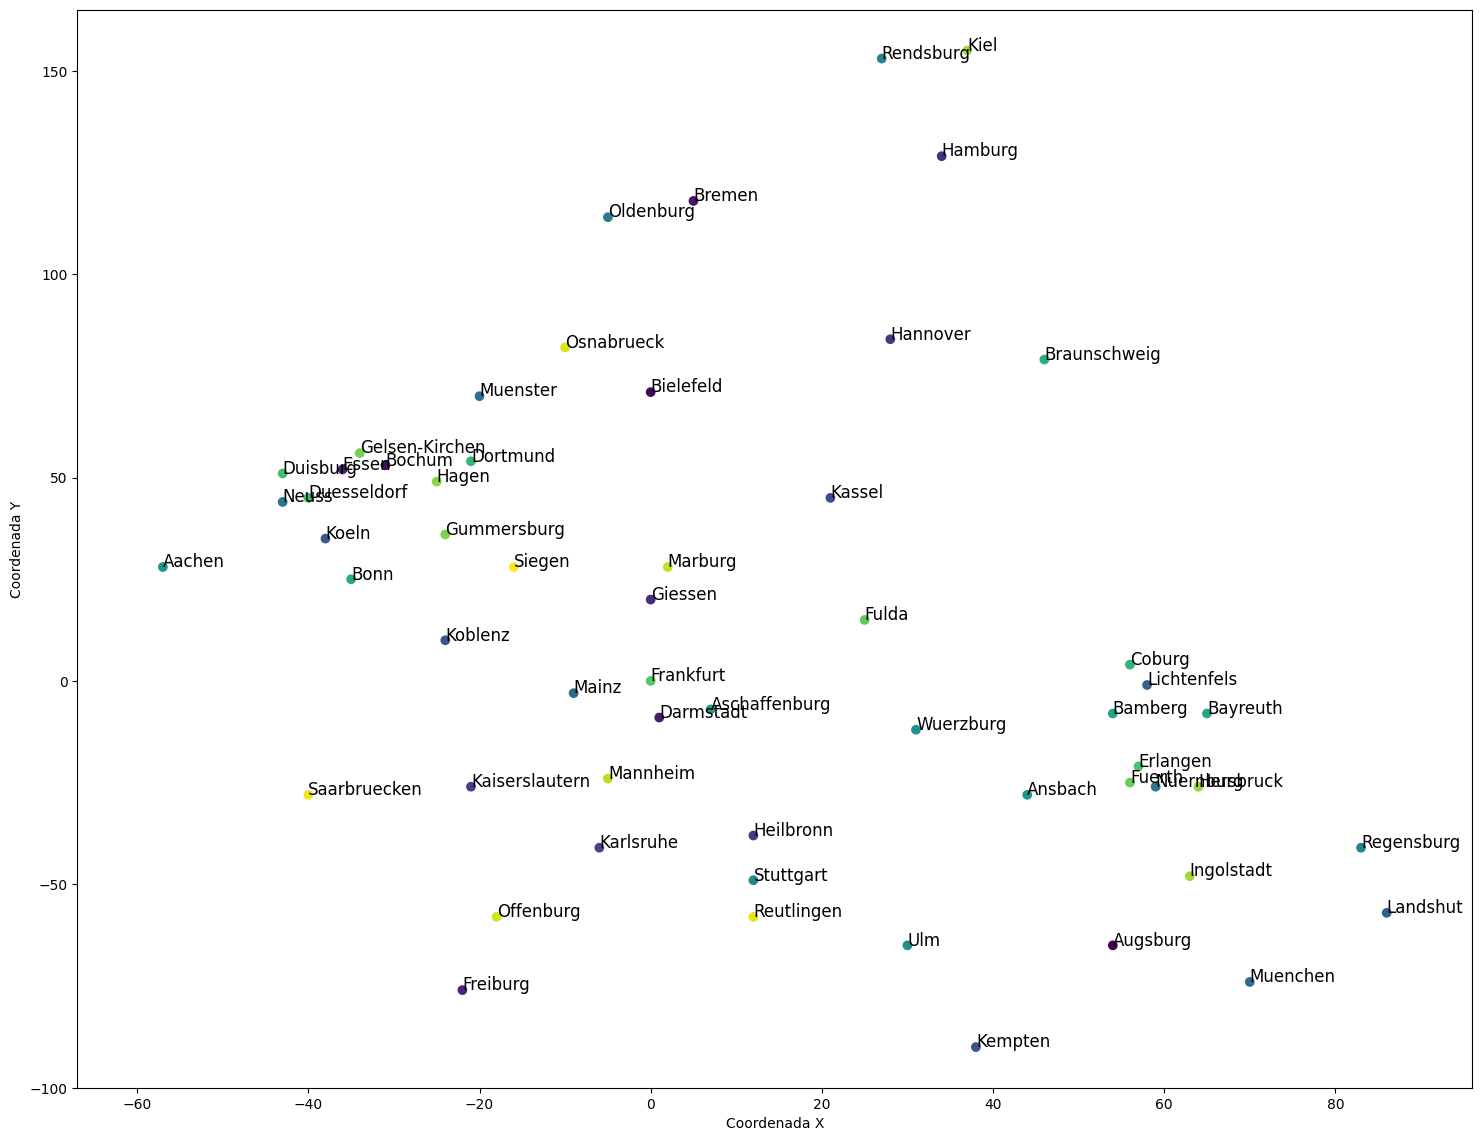

In [50]:
import numpy as np
# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler coordenadas das cidades
with open('59 cidades alemãs/coordenadas.txt', 'r') as coordenadas_file:
    coordenadas = [tuple(map(float, linha.strip().split())) for linha in coordenadas_file]

# Criar o dicionário de cidades
cidades = dict(zip(nomes, coordenadas))

# Agora você pode usar o dicionário 'cidades' para plotar os pontos
import matplotlib.pyplot as plt

# Criar listas separadas para as coordenadas x e y
coordenadas_x, coordenadas_y = zip(*cidades.values())


# Tamanho da figura
largura_figura = 18
altura_figura = 14

# Criar a figura com tamanho específico
plt.figure(figsize=(largura_figura, altura_figura))

# Plotar os pontos das cidades
cores = np.arange(len(cidades))
plt.scatter(coordenadas_x, coordenadas_y, c=cores, cmap='viridis')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=12)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Ajustar a escala dos eixos para melhor visualização
# Você pode ajustar esses valores conforme necessário
plt.xlim(min(coordenadas_x) - 10, max(coordenadas_x) + 10)
plt.ylim(min(coordenadas_y) - 10, max(coordenadas_y) + 10)

# Exibir o gráfico
plt.show()


#
É possível associar que cidades vizinhas podem ter caminho uma para outra analisando aproximidade de acordo com seus pontos no gráfico e verificando os caminhos reais existentes com o Google Maps .

Com isso, foi feito o arquivo [Relaçẽs.csv](/59%20cidades%20alemãs/Relações.csv);

## Atribuindo nomes aos números da cidade 

In [51]:
cidades = {i: nome for i, nome in enumerate(nomes)}

# Agora você pode associar o número da linha a uma cidade
for numero_linha, nome_cidade in cidades.items():
    print(f"Número da linha: {numero_linha}, Cidade: {nome_cidade}")


Número da linha: 0, Cidade: Augsburg
Número da linha: 1, Cidade: Bielefeld
Número da linha: 2, Cidade: Bochum
Número da linha: 3, Cidade: Bremen
Número da linha: 4, Cidade: Darmstadt
Número da linha: 5, Cidade: Essen
Número da linha: 6, Cidade: Freiburg
Número da linha: 7, Cidade: Giessen
Número da linha: 8, Cidade: Hamburg
Número da linha: 9, Cidade: Hannover
Número da linha: 10, Cidade: Heilbronn
Número da linha: 11, Cidade: Kaiserslautern
Número da linha: 12, Cidade: Karlsruhe
Número da linha: 13, Cidade: Kassel
Número da linha: 14, Cidade: Kempten
Número da linha: 15, Cidade: Koblenz
Número da linha: 16, Cidade: Koeln
Número da linha: 17, Cidade: Landshut
Número da linha: 18, Cidade: Lichtenfels
Número da linha: 19, Cidade: Mainz
Número da linha: 20, Cidade: Muenchen
Número da linha: 21, Cidade: Muenster
Número da linha: 22, Cidade: Neuss
Número da linha: 23, Cidade: Nuernburg
Número da linha: 24, Cidade: Oldenburg
Número da linha: 25, Cidade: Regensburg
Número da linha: 26, Cidade

## Lendo a matriz de distancias


In [52]:
import numpy as np

# Ler a matriz de distâncias do arquivo
arquivo_distancias = '59 cidades alemãs/distancias.txt'
matriz_distancias = np.loadtxt(arquivo_distancias)

# Exibir a matriz de distâncias
print("Matriz de Distâncias:")
print(matriz_distancias)



Matriz de Distâncias:
[[  0. 146. 145. ...  42. 101. 116.]
 [146.   0.  35. ... 129. 106.  45.]
 [145.  35.   0. ... 119.  81.  29.]
 ...
 [ 42. 129. 119. ...   0.  60.  90.]
 [101. 106.  81. ...  60.   0.  60.]
 [116.  45.  29. ...  90.  60.   0.]]


In [53]:
import numpy as np

# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler a matriz de distâncias do arquivo
arquivo_distancias = '59 cidades alemãs/distancias.txt'
matriz_distancias = np.loadtxt(arquivo_distancias)

# Criar um dicionário associando nomes de cidades a índices
cidades_para_indices = {cidade: indice for indice, cidade in enumerate(nomes)}

# Exemplo de como acessar a distância entre duas cidades pelo nome
cidade_origem = 'Kiel'
cidade_destino = 'Rendsburg'

indice_origem = cidades_para_indices[cidade_origem]
indice_destino = cidades_para_indices[cidade_destino]

distancia = matriz_distancias[indice_origem, indice_destino]

print(f"A distância entre {cidade_origem} e {cidade_destino} é {distancia}")


A distância entre Kiel e Rendsburg é 10.0


# Criando um arquivo de saída para trabalhar com os Grafos

Com as informações de caminhos entre as cidades e a distãncia entre dois caminhos (dado da matriz) é possível criar um arquivo csv que possui as relações de caminho entre as cidades e a distância entre elas.

In [54]:
import numpy as np
import csv

# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler a matriz de distâncias do arquivo
arquivo_distancias = '59 cidades alemãs/distancias.txt'
matriz_distancias = np.loadtxt(arquivo_distancias)

# Criar um dicionário associando nomes de cidades a índices
cidades_para_indices = {cidade: indice for indice, cidade in enumerate(nomes)}

# Ler dados de origem e destino de um arquivo CSV
arquivo_csv = '59 cidades alemãs/Relações.csv'  
saida_csv = 'dataset/saida.csv'  

with open(arquivo_csv, 'r', encoding='utf-8') as csv_file, open(saida_csv, 'w', newline='', encoding='utf-8') as saida_file:
    leitor_csv = csv.reader(csv_file)
    escritor_csv = csv.writer(saida_file)

    # Escrever cabeçalho no arquivo de saída
    escritor_csv.writerow(['Origem', 'Destino', 'Distancia'])

    # Iterar sobre as linhas do CSV de entrada
    for linha in leitor_csv:
        cidade_origem = linha[0]
        cidade_destino = linha[1]

        # Obter índices das cidades na matriz de distâncias
        indice_origem = cidades_para_indices[cidade_origem]
        indice_destino = cidades_para_indices[cidade_destino]

        # Obter a distância
        distancia = matriz_distancias[indice_origem, indice_destino]

        # Escrever no arquivo de saída
        escritor_csv.writerow([cidade_origem, cidade_destino, distancia])

print(f"Arquivo {saida_csv} gerado com sucesso.")


Arquivo saida.csv gerado com sucesso.


# Grafo das cidades 
Com as informações contidas, o grafo é criado e plotado considerando as coordenadas, caminhos para representar as arestas e cada cidade é um vértice do grafo.
Vale ressaltar que esse grafo abordado é um grafo não dirigido, pois consideramos idealmente que as estradas são as mesmas para "ir" e para "voltar" entre dois vértices (cidades)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Caminho para o arquivo CSV n
caminho_arquivo = 'dataset/saida.csv'  

# Carregar o CSV para um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler coordenadas das cidades
with open('59 cidades alemãs/coordenadas.txt', 'r') as coordenadas_file:
    coordenadas = [tuple(map(float, linha.strip().split())) for linha in coordenadas_file]

# Criar o dicionário de cidades
cidades = dict(zip(nomes, coordenadas))

# Criar grafo
G = nx.Graph()

# Adicionar nós com as coordenadas específicas
for cidade, coordenada in cidades.items():
    G.add_node(cidade, pos=coordenada)

# Adicionar arestas do dataframe
for index, row in df.iterrows():
    G.add_edge(row['Origem'], row['Destino'], Distancia=row['Distancia'])




# Plotando o grafo sem aplicar algoritmos

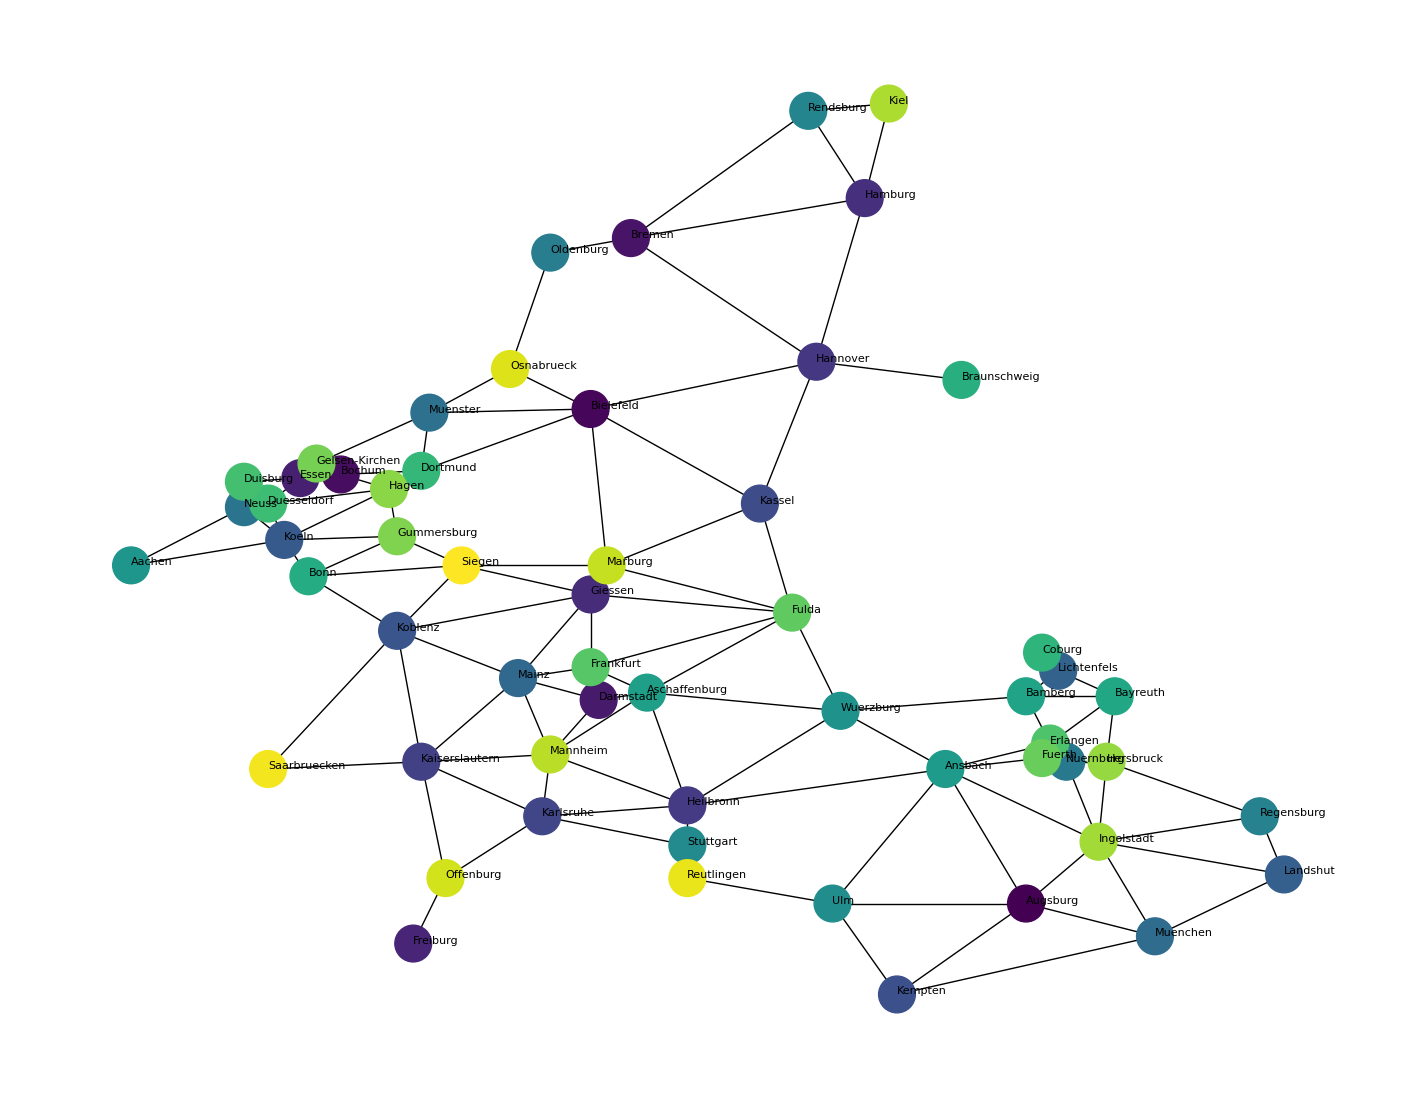

In [4]:
# criar uma lista de cores para os nós (cores diferentes para cada cidade)
cores = np.arange(len(G.nodes))

# criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# desenhar nós com cores específicas
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

# desenhar arestas
nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), width=1)

# adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()

# Encontrando menor caminho entre duas cidades usando algoritmo pronto da lib netowrkx

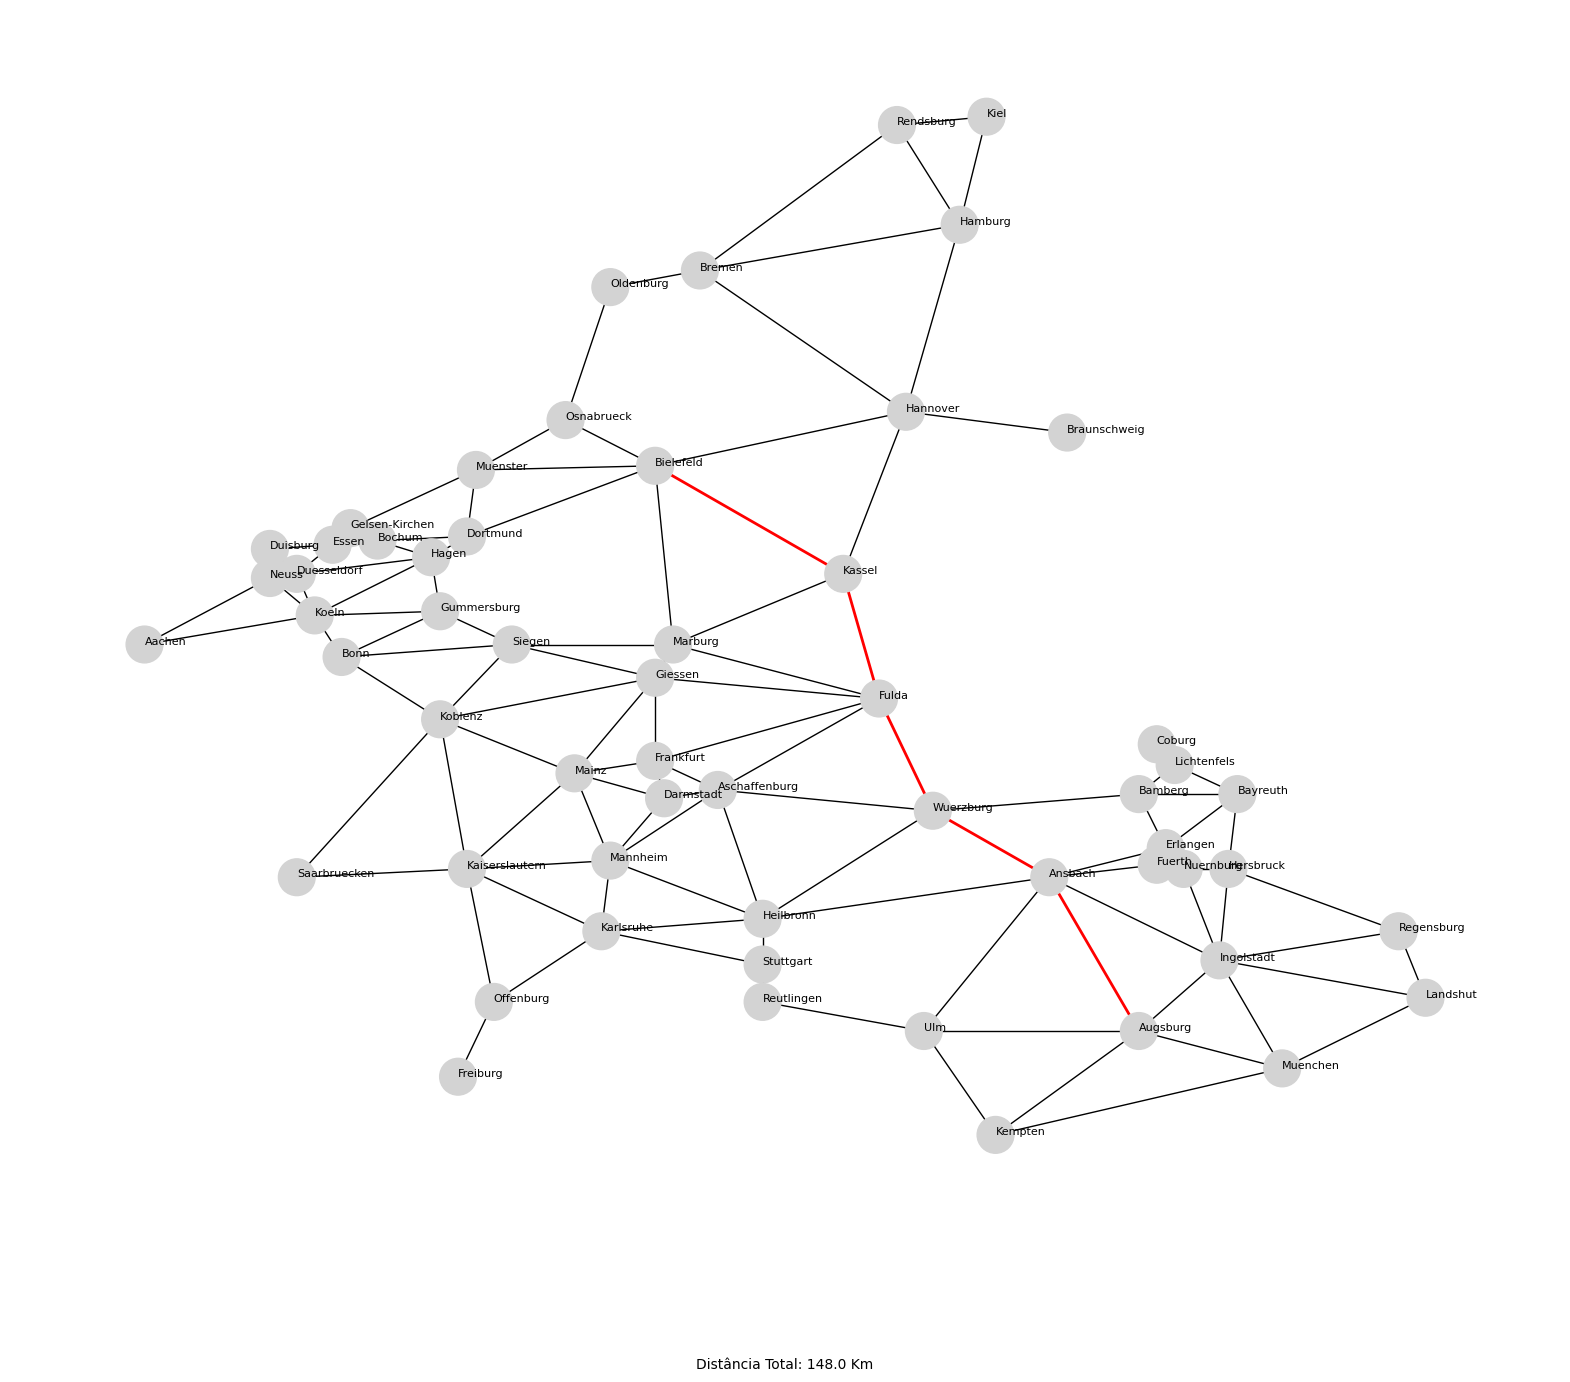

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widgets de seleção para cidades de origem e destino
cidade_origem_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Origem:")
cidade_destino_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Destino:")

# Botão de cálculo
calcular_button = widgets.Button(description="Calcular")

# Função para calcular e exibir o menor caminho
def calcular_menor_caminho(b):
    clear_output(wait=True)  # Limpar a saída para evitar sobreposição
    cidade_origem = cidade_origem_dropdown.value
    cidade_destino = cidade_destino_dropdown.value
    
    # Calcular o menor caminho
    menor_caminho = nx.shortest_path(G, source=cidade_origem, target=cidade_destino, weight='Distancia', method='dijkstra')
    distancia_total = nx.shortest_path_length(G, source=cidade_origem, target=cidade_destino, weight='Distancia', method='dijkstra')


    # Criar um novo grafo para destacar o menor caminho
    G_destacado = G.copy()

    # Adicionar arestas do menor caminho
    for i in range(len(menor_caminho) - 1):
        origem = menor_caminho[i]
        destino = menor_caminho[i + 1]
        G_destacado[origem][destino]['cor'] = 'red'

    # Criar a figura com tamanho específico
    plt.figure(figsize=(20, 16))

    # Desenhar nós com cores específicas
    nx.draw_networkx_nodes(G_destacado, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

    # Desenhar arestas com destaque para o menor caminho
    arestas_destacadas = [(origem, destino) for origem, destino, dados in G_destacado.edges(data=True) if 'cor' in dados]
    arestas_normais = [(origem, destino) for origem, destino in G_destacado.edges() if (origem, destino) not in arestas_destacadas]

    nx.draw_networkx_edges(G_destacado, pos=nx.get_node_attributes(G_destacado, 'pos'), edgelist=arestas_normais, width=1)
    nx.draw_networkx_edges(G_destacado, pos=nx.get_node_attributes(G_destacado, 'pos'), edgelist=arestas_destacadas, width=2, edge_color='red')

    # Adicionar rótulos (nomes) para cada cidade
    for cidade, coordenada in cidades.items():
        plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

    # Adicionar rótulos aos eixos
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.axis('off')

    plt.text(0.5, -0.1, f'Distância Total: {distancia_total} Km', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

# Associar a função ao botão de cálculo
calcular_button.on_click(calcular_menor_caminho)

# Exibir widgets
display(cidade_origem_dropdown, cidade_destino_dropdown, calcular_button)

# Fazendo o Algoritmo de Dijkstra explicitamente 

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import heapq

def dijkstra(G, source, target, weight='Distancia'):
    # Inicialização
    dist = {node: float('inf') for node in G.nodes}
    dist[source] = 0
    previous = {node: None for node in G.nodes}
    heap = [(0, source)]  # (distância até o nó, nó)

    while heap:
        current_dist, current_node = heapq.heappop(heap)

        # Se o nó atual já foi visitado, ignore-o
        if current_dist > dist[current_node]:
            continue

        # Relaxamento das arestas
        for neighbor, data in G[current_node].items():
            edge_weight = data.get(weight, 1)  # Peso padrão é 1 se não especificado
            new_dist = dist[current_node] + edge_weight

            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                previous[neighbor] = current_node
                heapq.heappush(heap, (new_dist, neighbor))

    # Reconstruir o caminho
    path = []
    current = target
    while previous[current] is not None:
        path.insert(0, current)
        current = previous[current]
    path.insert(0, source)

    return path, dist[target]

# Widgets de seleção para cidades de origem e destino
cidade_origem_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Origem:")
cidade_destino_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Destino:")

# Botão de cálculo
calcular_button = widgets.Button(description="Calcular")

# Função para calcular e exibir o menor caminho
def calcular_menor_caminho(b):
    clear_output(wait=True)  # Limpar a saída para evitar sobreposição
    cidade_origem = cidade_origem_dropdown.value
    cidade_destino = cidade_destino_dropdown.value
    
    # Calcular o menor caminho
    menor_caminho, distancia_total = dijkstra(G, source=cidade_origem, target=cidade_destino, weight='Distancia')

    # Criar um novo grafo para destacar o menor caminho
    G_destacado = G.copy()

    # Adicionar arestas do menor caminho
    for i in range(len(menor_caminho) - 1):
        origem = menor_caminho[i]
        destino = menor_caminho[i + 1]
        G_destacado[origem][destino]['cor'] = 'red'

    # Criar a figura com tamanho específico
    plt.figure(figsize=(20, 16))

    # Desenhar nós com cores específicas
    nx.draw_networkx_nodes(G_destacado, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

    # Desenhar arestas com destaque para o menor caminho
    arestas_destacadas = [(origem, destino) for origem, destino, dados in G_destacado.edges(data=True) if 'cor' in dados]
    arestas_normais = [(origem, destino) for origem, destino in G_destacado.edges() if (origem, destino) not in arestas_destacadas]

    nx.draw_networkx_edges(G_destacado, pos=nx.get_node_attributes(G_destacado, 'pos'), edgelist=arestas_normais, width=1)
    nx.draw_networkx_edges(G_destacado, pos=nx.get_node_attributes(G_destacado, 'pos'), edgelist=arestas_destacadas, width=2, edge_color='red')

    # Adicionar rótulos (nomes) para cada cidade
    for cidade, coordenada in cidades.items():
        plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

    # Adicionar rótulos aos eixos
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.axis('off')

    plt.text(0.5, -0.1, f'Distância Total: {distancia_total} Km', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

# Associar a função ao botão de cálculo
calcular_button.on_click(calcular_menor_caminho)

# Exibir widgets
display(cidade_origem_dropdown, cidade_destino_dropdown, calcular_button)


Dropdown(description='Cidade de Origem:', options=('Augsburg', 'Bielefeld', 'Bochum', 'Bremen', 'Darmstadt', '…

Dropdown(description='Cidade de Destino:', options=('Augsburg', 'Bielefeld', 'Bochum', 'Bremen', 'Darmstadt', …

Button(description='Calcular', style=ButtonStyle())

# Encontrando as cidades que mais aparecem ao se calcular todos os menores caminhos 


In [9]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Caminho para o arquivo CSV n
caminho_arquivo = 'dataset/saida.csv'  

# Carregar o CSV para um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler coordenadas das cidades
with open('59 cidades alemãs/coordenadas.txt', 'r') as coordenadas_file:
    coordenadas = [tuple(map(float, linha.strip().split())) for linha in coordenadas_file]

# Criar o dicionário de cidades
cidades = dict(zip(nomes, coordenadas))

# Criar grafo
G = nx.Graph()

# Adicionar nós com as coordenadas específicas
for cidade, coordenada in cidades.items():
    G.add_node(cidade, pos=coordenada)

# Adicionar arestas do dataframe
for index, row in df.iterrows():
    G.add_edge(row['Origem'], row['Destino'], Distancia=row['Distancia'])

def dijkstra(G, source, target, weight='Distancia'):
    # Inicialização
    dist = {node: float('inf') for node in G.nodes}
    dist[source] = 0
    previous = {node: None for node in G.nodes}
    heap = [(0, source)]  # (distância até o nó, nó)

    while heap:
        current_dist, current_node = heapq.heappop(heap)

        # Se o nó atual já foi visitado, ignore-o
        if current_dist > dist[current_node]:
            continue

        # Relaxamento das arestas
        for neighbor, data in G[current_node].items():
            edge_weight = data.get(weight, 1)  # Peso padrão é 1 se não especificado
            new_dist = dist[current_node] + edge_weight

            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                previous[neighbor] = current_node
                heapq.heappush(heap, (new_dist, neighbor))

    # Reconstruir o caminho
    path = []
    current = target
    while previous[current] is not None:
        path.insert(0, current)
        current = previous[current]
    path.insert(0, source)

    return path, dist[target]
# Função para calcular as distâncias entre todos os pares de cidades
def calcular_distancias_entre_todos(G):
    todas_as_cidades = list(G.nodes)
    distancias = {}

    for origem, destino in itertools.permutations(todas_as_cidades, 2):
        menor_caminho, distancia_total = dijkstra(G, source=origem, target=destino, weight='Distancia')
        distancias[(origem, destino)] = distancia_total

    return distancias

# Função para mostrar um ranking das cidades mais frequentes nos caminhos mais curtos

def mostrar_ranking(distancias):
    cidades_frequentes = {}

    for (origem, destino), distancia in distancias.items():
        menor_caminho, _ = dijkstra(G, source=origem, target=destino, weight='Distancia')
        for cidade in menor_caminho:
            cidades_frequentes[cidade] = cidades_frequentes.get(cidade, 0) + 1

    # Ordenar o ranking
    ranking = sorted(cidades_frequentes.items(), key=lambda x: x[1], reverse=True)

    # Mostrar o ranking
    for cidade, frequencia in ranking:
        print(f'{cidade}: {frequencia} vezes')

# Calcular as distâncias entre todos os pares de cidades
distancias_entre_todos = calcular_distancias_entre_todos(G)

# Mostrar o ranking
mostrar_ranking(distancias_entre_todos)


Wuerzburg: 1135 vezes
Ansbach: 902 vezes
Fulda: 814 vezes
Giessen: 697 vezes
Kassel: 634 vezes
Koblenz: 625 vezes
Aschaffenburg: 621 vezes
Mainz: 597 vezes
Siegen: 577 vezes
Gummersburg: 555 vezes
Heilbronn: 508 vezes
Hagen: 503 vezes
Hannover: 488 vezes
Koeln: 474 vezes
Bonn: 471 vezes
Bamberg: 390 vezes
Bielefeld: 388 vezes
Darmstadt: 379 vezes
Fuerth: 374 vezes
Marburg: 356 vezes
Stuttgart: 352 vezes
Osnabrueck: 352 vezes
Nuernburg: 344 vezes
Ingolstadt: 320 vezes
Mannheim: 318 vezes
Kaiserslautern: 314 vezes
Duesseldorf: 310 vezes
Dortmund: 298 vezes
Frankfurt: 297 vezes
Muenster: 280 vezes
Reutlingen: 264 vezes
Hamburg: 262 vezes
Oldenburg: 260 vezes
Ulm: 244 vezes
Bochum: 239 vezes
Karlsruhe: 238 vezes
Hersbruck: 234 vezes
Essen: 230 vezes
Offenburg: 226 vezes
Lichtenfels: 226 vezes
Bremen: 206 vezes
Gelsen-Kirchen: 204 vezes
Erlangen: 188 vezes
Augsburg: 168 vezes
Rendsburg: 146 vezes
Neuss: 143 vezes
Regensburg: 130 vezes
Bayreuth: 126 vezes
Muenchen: 124 vezes
Landshut: 116 ve

# Arvore Geradora mínima:

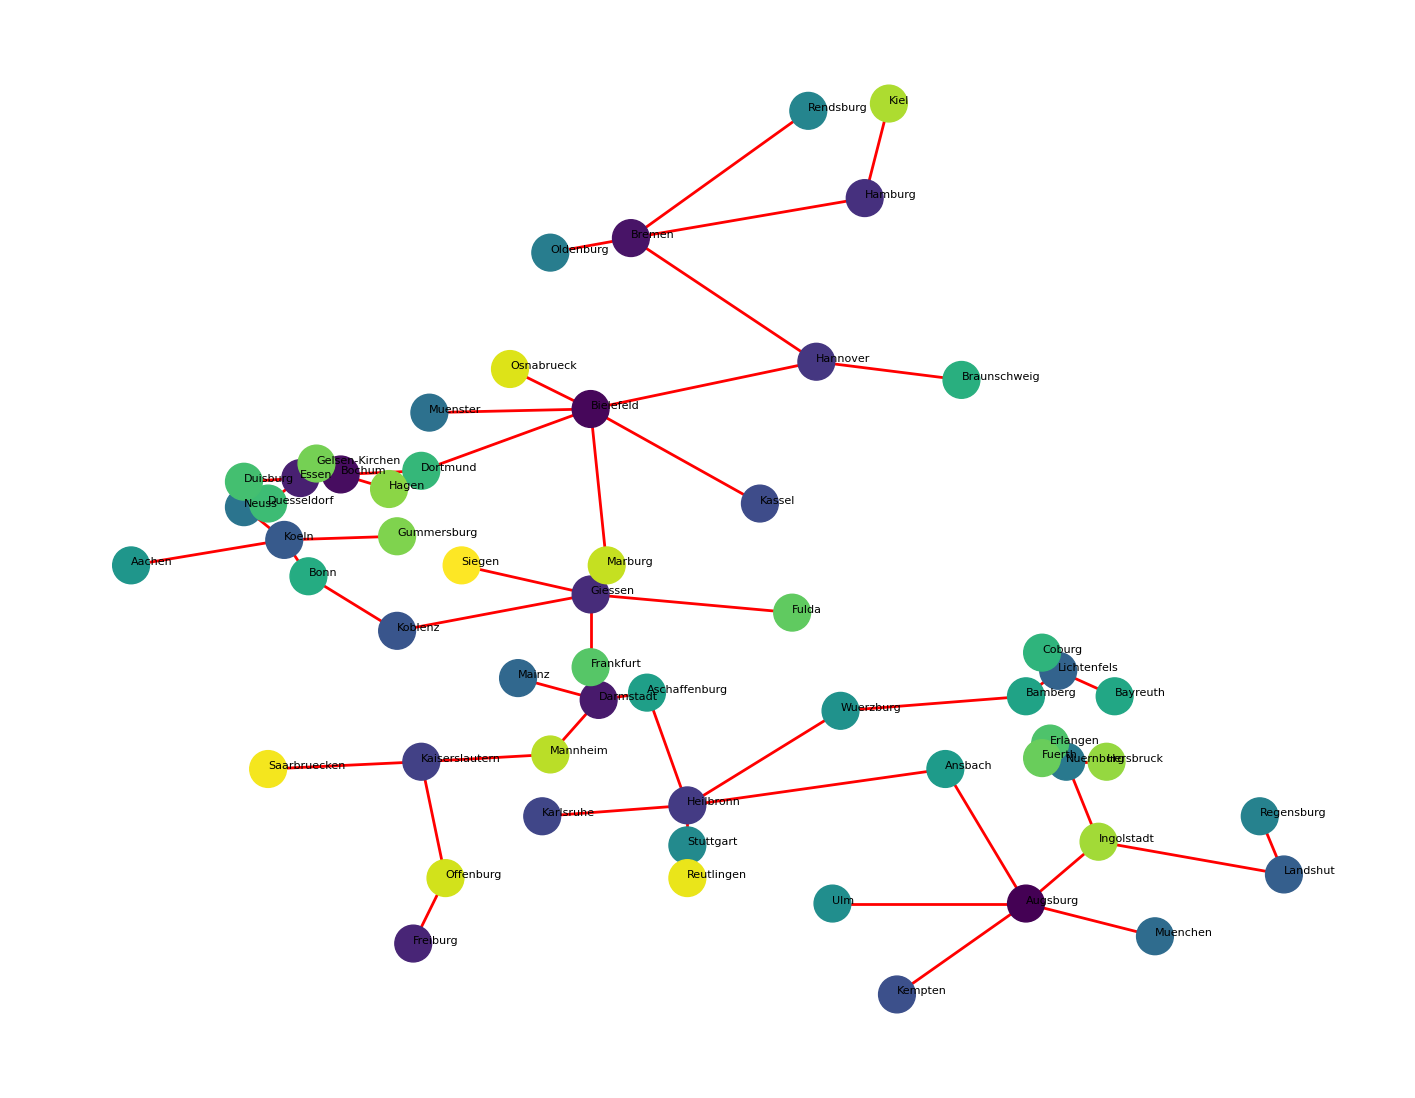

In [56]:

# Calcular a árvore geradora mínima
mst = nx.minimum_spanning_tree(G)

# Criar uma lista de cores para os nós (cores diferentes para cada cidade)
cores = np.arange(len(G.nodes))

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós da árvore geradora mínima com cores específicas
nx.draw_networkx_nodes(mst, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

# Desenhar arestas da árvore geradora mínima
nx.draw_networkx_edges(mst, pos=nx.get_node_attributes(G, 'pos'), width=2, edge_color='red')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()

# Kruskal explicito

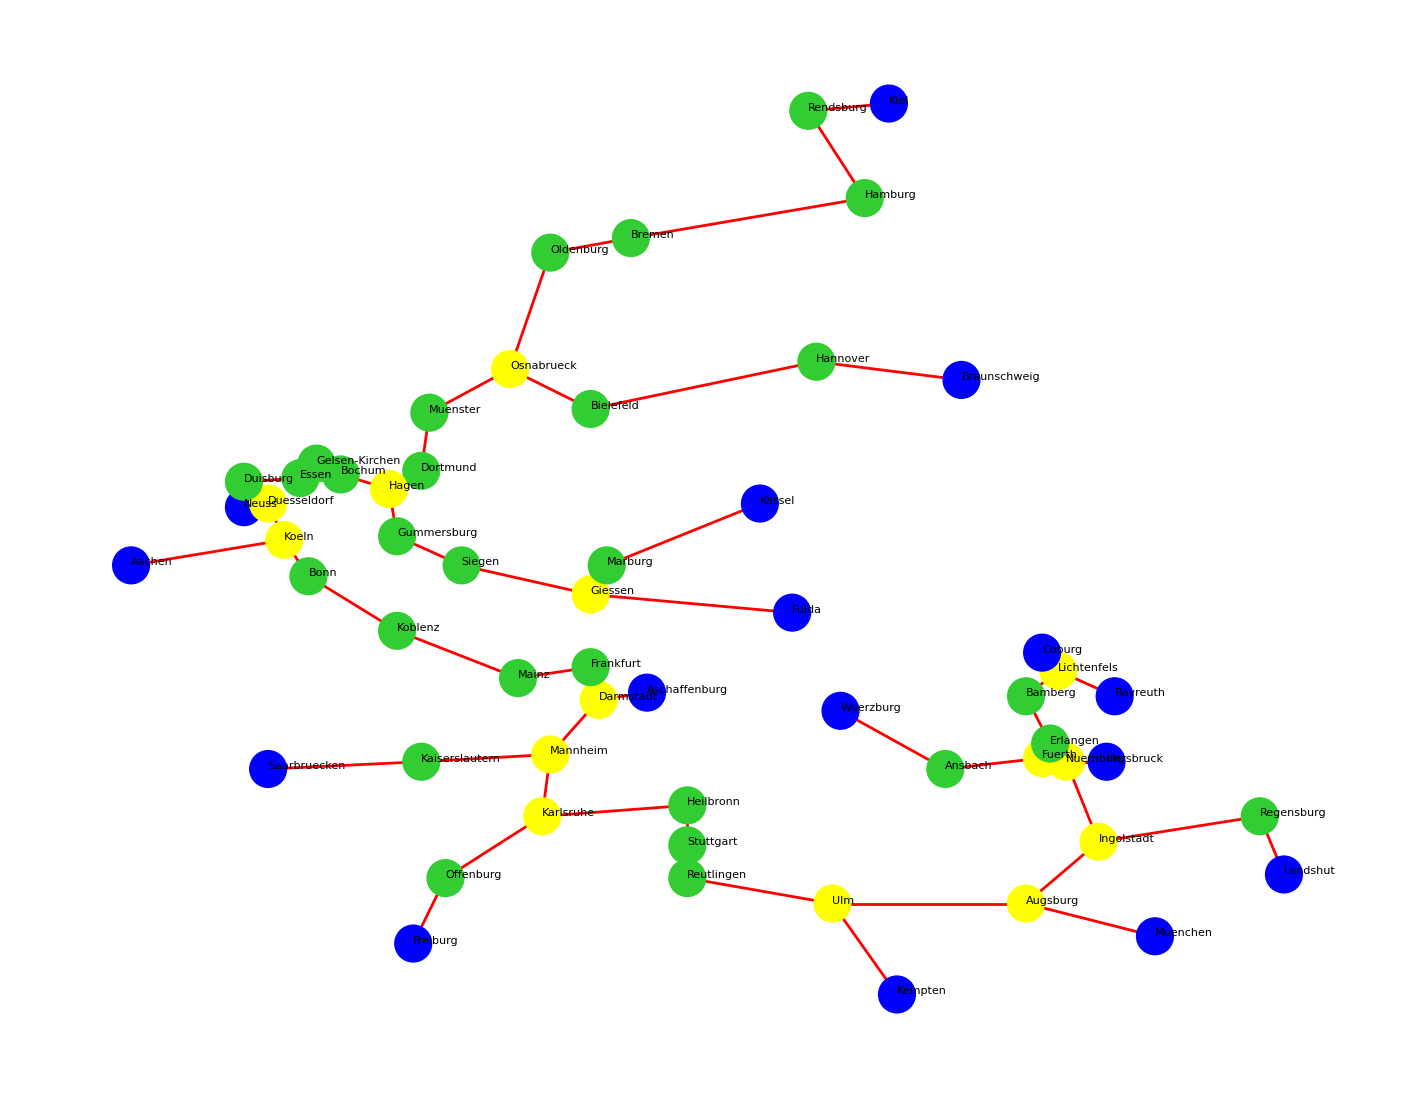

In [73]:
def kruskal(graph):
    # Inicializa uma floresta onde cada vértice está em uma árvore separada
    forest = {vertex: {vertex} for vertex in graph.nodes}

    # Ordena todas as arestas em ordem não decrescente de peso
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['Distancia'])

    # Inicializa a árvore geradora mínima
    mst = nx.Graph()

    for edge in edges:
        u, v, weight = edge
        tree_u = next((tree for tree in forest.values() if u in tree), None)
        tree_v = next((tree for tree in forest.values() if v in tree), None)

        # Verifica se as extremidades da aresta estão em árvores diferentes
        if tree_u != tree_v:
            mst.add_edge(u, v, weight=weight['Distancia'])

            # Une as árvores em uma única árvore
            # Une as árvores em uma única árvore
            tree_u.update(tree_v)
            for vertex in tree_v:
                forest[vertex] = tree_u         


    return mst



mst = kruskal(G)

# Calcular a quantidade de ligações para cada nó na árvore geradora mínima
node_degrees = dict(mst.degree())

# Mapear as cores de acordo com as regras especificadas
cores = []
for node in mst.nodes:
    if node_degrees[node] == 1:
        cores.append('blue')
    elif node_degrees[node] == 2:
        cores.append('limegreen')
    else:
        cores.append('yellow')

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós da árvore geradora mínima com cores específicas
nx.draw_networkx_nodes(mst, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores)

# Desenhar arestas da árvore geradora mínima
nx.draw_networkx_edges(mst, pos=nx.get_node_attributes(G, 'pos'), width=2, edge_color='red')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()




# Usuando nx.minimum_spanning_tree

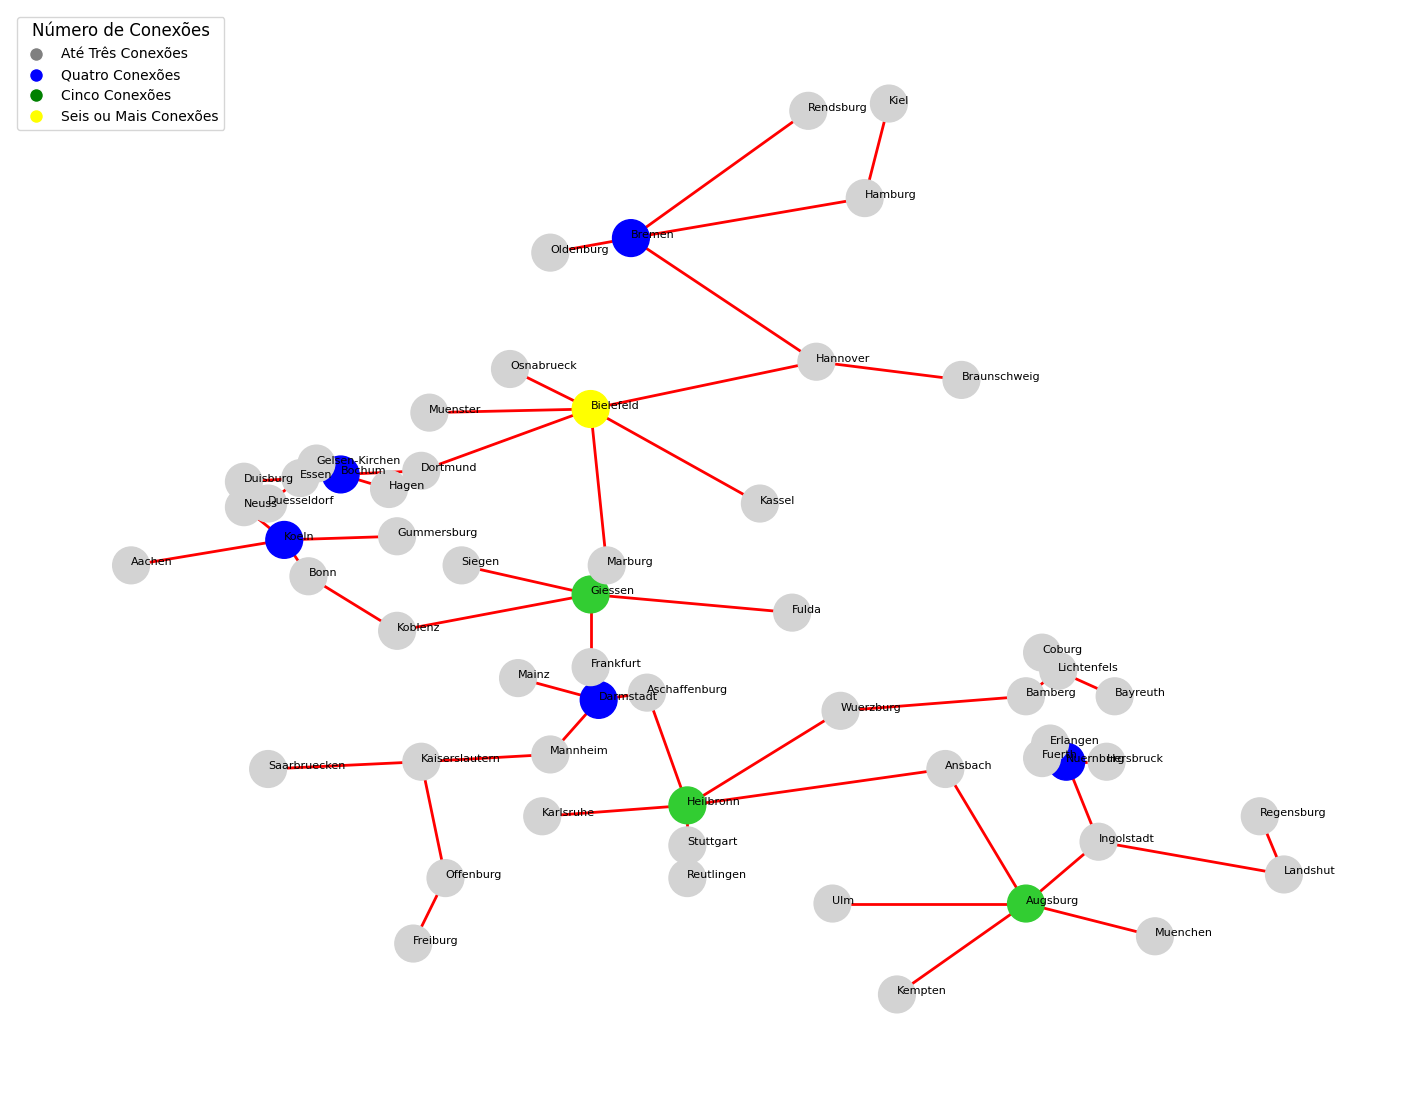

5
6
4
4
4
3
1
5
2
3
5
3
1
1
1
2
4
2
3
1
1
1
1
4
1
1
1
2
1
2
1
2
2
2
1
2
1
1
2
1
1
1
2
1
1
1
1
1
1
3
1
2
2
2
1
1
1
1
Distância total da árvore geradora mínima: 1052.0


In [11]:


# Calcular a árvore geradora mínima
mst = nx.minimum_spanning_tree(G)

# Criar uma lista de cores com base na quantidade de ligações de cada nó na árvore geradora mínima
num_conexoes = [mst.degree[node] for node in mst.nodes]
cores = []

# Definir cores com base no número de conexões
for num in num_conexoes:
    if num <= 3:
        cores.append('lightgray')
    elif num == 4:
        cores.append('blue')
    elif num == 5:
        cores.append('limegreen')
    else:
        cores.append('yellow')

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós da árvore geradora mínima com cores específicas
nx.draw_networkx_nodes(mst, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores)

# Desenhar arestas da árvore geradora mínima
nx.draw_networkx_edges(mst, pos=nx.get_node_attributes(G, 'pos'), width=2, edge_color='red')

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# LEGENDA
legend_labels = {
    'Até Três Conexões': 'gray',
    'Quatro Conexões': 'blue',
    'Cinco Conexões': 'green',
    'Seis ou Mais Conexões': 'yellow'
}

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels.values()]

plt.legend(legend_handles, legend_labels.keys(), loc='upper left', title='Número de Conexões', title_fontsize='12', fontsize='10')

plt.axis('off')
plt.show()

for node in mst.nodes:
    print(mst.degree[node])

# Calcular a distância total da árvore geradora mínima
total_distance = sum([G[u][v]['Distancia'] for u, v in mst.edges()])

# Imprimir a distância total
print(f"Distância total da árvore geradora mínima: {total_distance}")



A divergência nas árvores geradoras mínimas (MSTs) entre implementações diferentes não é necessariamente um problema. Pode haver várias razões para as diferenças, como empates em pesos de arestas ou detalhes específicos da implementação de cada algoritmo. O importante é entender que a MST não é única quando há empates nos pesos das arestas.

Algumas considerações:

Empates nos Pesos: Se há arestas no grafo com pesos idênticos, diferentes algoritmos ou implementações podem escolher diferentes combinações dessas arestas, resultando em árvores geradoras mínimas ligeiramente diferentes. Isso é normal e não indica um problema.

Correção do Algoritmo: Ambas as implementações podem estar corretas, mas estão resolvendo empates de maneiras ligeiramente diferentes. Desde que ambas as implementações estejam de acordo com as propriedades da árvore geradora mínima, elas são válidas.

Verificação Visual: Se você quiser verificar visualmente as diferenças entre as MSTs, pode plotar ambas as árvores e observar onde elas diferem. Isso pode ajudar a entender quais arestas específicas estão contribuindo para as diferenças.

Utilização em Aplicações: Se você estiver usando a MST em uma aplicação específica, é importante garantir que a MST atenda aos requisitos da sua aplicação. Se ambas as implementações produzem árvores geradoras mínimas válidas, você pode escolher aquela que melhor se adequa às suas necessidades.